In [228]:
#Import libraries
import os #Operating System interactions
import pandas as pd #Panel Data - for working with tabular data
import geopandas as gp # for GIS analysis or Geo Processing
from shapely.geometry import Point #Allows you to vreate gpkg files from xy data
import numpy as np #Numerical Calc
from matplotlib import pyplot as plt 
import matplotlib_map_utils as mapu #Alias of Map Utils like 'plt' for plot. For North Arrow.

In [229]:
#Set the directories
path = "C:/Users/aksha/Downloads/Mini Project"
os.chdir(path) #Change the directory to that path

In [230]:
fname1 = 'Texas Map.gpkg'
texas = gp.read_file(fname1)

In [231]:
crs = texas.crs
print("CRS:", crs)

CRS: EPSG:4269


In [232]:
# Reproject the data to WGS84 (EPSG:4326)
texas_84 = texas.to_crs(epsg=4326)

In [233]:
crs = texas_84.crs
print("CRS:", crs)

CRS: EPSG:4326


In [234]:
texas_84.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-106.64548 31.89867, -106.6408..."


In [235]:
type(texas_84)

geopandas.geodataframe.GeoDataFrame

In [236]:
print(texas_84.crs)

EPSG:4326


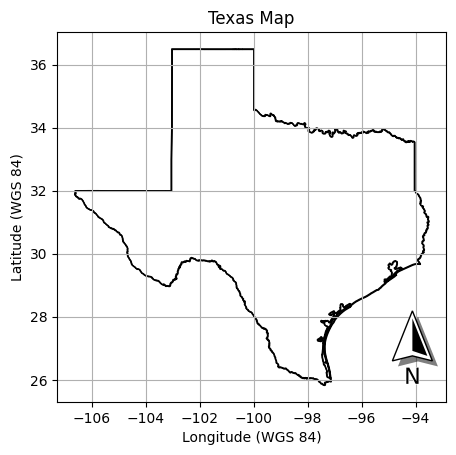

In [237]:
#Visualize the overlay result (you can customise this based on your needs)
fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_84.plot(ax=ax1, color='none', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
plt.grid()
plt.title ('Texas Map')
plt.show()

In [238]:
bd_2022 = pd.read_csv('2022_Data.csv')
bd_2023 = pd.read_csv('2023_Data.csv')

In [239]:
# Converting to DD
def dms_to_dd(value):
    string_value = str(abs(int(value)))  # Ensure the value is treated as an integer and absolute

    seconds = int(string_value[-4:]) / 100  # Seconds are the last four digits, divided by 100
    minutes = int(string_value[-6:-4])      # Minutes are the two digits before the seconds
    degrees = int(string_value[:-6])        # Degrees are everything before the minutes

    # Convert DMS to DD
    dd = degrees + minutes / 60 + seconds / 3600

    # Return the result as a negative, if it was negative
    return -dd if value < 0 else dd


In [240]:
# Remove rows with NaN values
bd_2022 = bd_2022.dropna(subset=['LAT_016', 'LONG_017'])
bd_2023 = bd_2023.dropna(subset=['LAT_016', 'LONG_017'])

# Apply the conversion to lat & long for 2022
bd_2022['LAT_016'] = bd_2022['LAT_016'].apply(dms_to_dd)
bd_2022['LONG_017'] = bd_2022['LONG_017'].apply(lambda x: -dms_to_dd(x))  # Longitude is negative for the western hemisphere

# Convert lat & long to numerical values, coerce errors to NaN
bd_2022['LAT_016'] = pd.to_numeric(bd_2022['LAT_016'], errors='coerce')
bd_2022['LONG_017'] = pd.to_numeric(bd_2022['LONG_017'], errors='coerce')

# Apply the conversion to lat & long for 2023
bd_2023['LAT_016'] = bd_2023['LAT_016'].apply(dms_to_dd)
bd_2023['LONG_017'] = bd_2023['LONG_017'].apply(lambda x: -dms_to_dd(x))  # Longitude is negative for the western hemisphere

bd_2023['LAT_016'] = pd.to_numeric(bd_2023['LAT_016'], errors='coerce')
bd_2023['LONG_017'] = pd.to_numeric(bd_2023['LONG_017'], errors='coerce')

# Print new DataFrame
print(bd_2022[['LAT_016', 'LONG_017']])
print(bd_2023[['LAT_016', 'LONG_017']])

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
13074  32.481350  -99.773856
13075  32.481936  -99.770703
13076  32.483747  -99.768828
13077  32.479967  -99.702819
13078  32.479672  -99.703036

[13079 rows x 2 columns]
         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
25698  30.217808  -95.448761
25699  30.331847  -95.400336
25700  30.090164  -95.356197
25701  30.088192  -95.350372
25702  30.137833  -95.410661

[25703 rows x 2 columns]


In [241]:
# Print the new DataFrame 2022, 2023
print(bd_2022[['LAT_016', 'LONG_017']])
type(bd_2023)
print(bd_2023[['LAT_016', 'LONG_017',]])
type(bd_2023)

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
13074  32.481350  -99.773856
13075  32.481936  -99.770703
13076  32.483747  -99.768828
13077  32.479967  -99.702819
13078  32.479672  -99.703036

[13079 rows x 2 columns]
         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
25698  30.217808  -95.448761
25699  30.331847  -95.400336
25700  30.090164  -95.356197
25701  30.088192  -95.350372
25702  30.137833  -95.410661

[25703 rows x 2 columns]


pandas.core.frame.DataFrame

In [242]:
structure_2022 = bd_2022['STRUCTURE_NUMBER_008']
structure_2023 = bd_2023['STRUCTURE_NUMBER_008']

In [243]:
type(structure_2023)

pandas.core.series.Series

In [244]:
Bridges_2023 = structure_2023[~structure_2023.isin(structure_2022)]

In [245]:
print(Bridges_2023)

9        000021594-62610
17              1.00E+13
115      010600AA2130001
117             1.08E+13
118             1.08E+13
              ...       
25698    121700A30314010
25699    121700A30586010
25700    121700A31719010
25701    121700A31719011
25702    121700A33635010
Name: STRUCTURE_NUMBER_008, Length: 20147, dtype: object


In [246]:
final_bridges_bd = bd_2023[bd_2023['STRUCTURE_NUMBER_008'].isin(Bridges_2023)]

In [247]:
type(final_bridges_bd)

pandas.core.frame.DataFrame

In [248]:
print(final_bridges_bd)

      STRUCTURE_NUMBER_008    LAT_016   LONG_017  SERVICE_ON_042A  \
9          000021594-62610  32.680500 -94.145833              1.0   
17                1.00E+13  30.516253 -95.074097              1.0   
115        010600AA2130001  33.371656 -95.774397              1.0   
117               1.08E+13  33.584389 -96.309761              1.0   
118               1.08E+13  33.584056 -96.308100              1.0   
...                    ...        ...        ...              ...   
25698      121700A30314010  30.217808 -95.448761              1.0   
25699      121700A30586010  30.331847 -95.400336              1.0   
25700      121700A31719010  30.090164 -95.356197              1.0   
25701      121700A31719011  30.088192 -95.350372              1.0   
25702      121700A33635010  30.137833 -95.410661              1.0   

       SERVICE_UND_042B  STRUCTURE_KIND_043A DECK_COND_058  \
9                   5.0                  5.0             8   
17                  5.0                  1.0   

In [249]:
final_bridges_bd.to_csv('Bridges_2023.csv', index=False)

In [250]:
type(final_bridges_bd)

pandas.core.frame.DataFrame

In [251]:
latitude = final_bridges_bd['LAT_016']
longitude = final_bridges_bd['LONG_017']

In [252]:
print(latitude)
print(longitude)

9        32.680500
17       30.516253
115      33.371656
117      33.584389
118      33.584056
           ...    
25698    30.217808
25699    30.331847
25700    30.090164
25701    30.088192
25702    30.137833
Name: LAT_016, Length: 20147, dtype: float64
9       -94.145833
17      -95.074097
115     -95.774397
117     -96.309761
118     -96.308100
           ...    
25698   -95.448761
25699   -95.400336
25700   -95.356197
25701   -95.350372
25702   -95.410661
Name: LONG_017, Length: 20147, dtype: float64


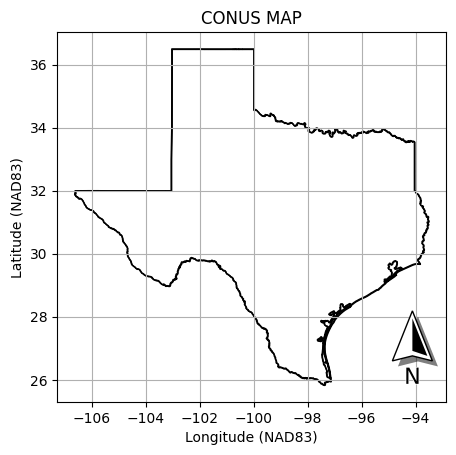

In [253]:
#Plotting CONUS
fig = plt.figure()
ax1 = fig.add_subplot()
texas_84.plot (facecolor='white', edgecolor='black', ax=ax1) #overlaping axis. 
texas_84.plot(ax=ax1, color='none', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (NAD83)')
ax1.set_ylabel('Latitude (NAD83)')
plt.grid()
plt.title('CONUS MAP')
plt.show()

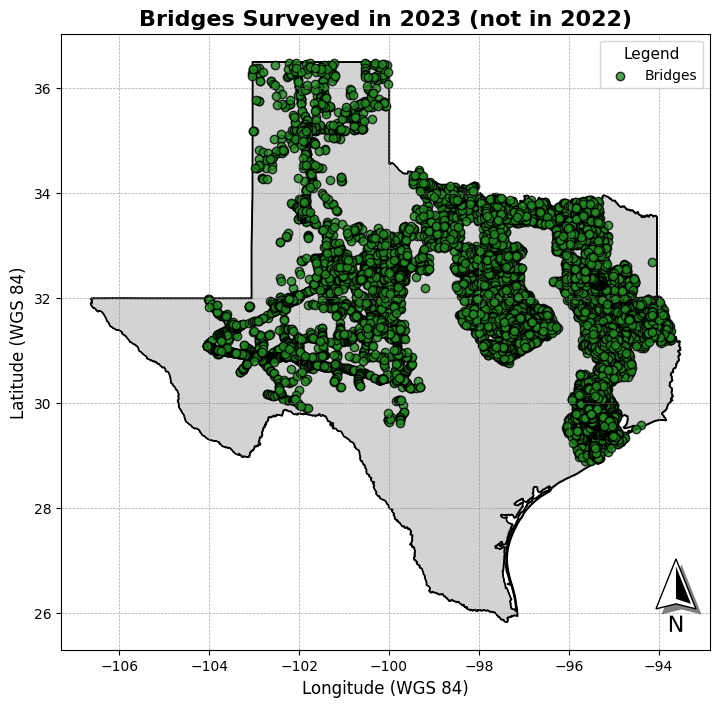

In [262]:
# Plotting
fig = plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
ax1 = fig.add_subplot()  # Create a subplot for the map

# Plot the base map with custom aesthetics
texas_84.plot(facecolor='lightgray', edgecolor='black', ax=ax1)  # Change facecolor for better contrast
texas_84.plot(ax=ax1, color='none', markersize=1)

# Scatter plot for bridge locations with enhanced aesthetics
scatter = plt.scatter(longitude, latitude, 
                      c='forestgreen', marker='o', edgecolor='black', alpha=0.8, label='Bridge Locations')

# Adding a north arrow
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees': 0})

ax1.set_xlabel('Longitude (WGS 84)', fontsize=12)
ax1.set_ylabel('Latitude (WGS 84)', fontsize=12)


ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize grid color and style

# Updating the legend
ax1.legend(['Bridges'], loc='upper right', fontsize=10, frameon=True, title='Legend', title_fontsize='11')

# Adding a title
plt.title('Bridges Surveyed in 2023 (ot in 2022', fontsize=16, fontweight='bold')

# Save the plot with specified dpi and tight layout
plt.savefig('bridge_2023_notin_2022.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [273]:
bd_2023_final = pd.read_csv('2023_Data_Unique.csv')